<a href="https://colab.research.google.com/github/swilsonmfc/anomaly/blob/master/MachineLearningRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Process


# Regression
* Classification maps data to a label
* Regression maps data to a countinuous outcome
* Low code approach to rapid prototyping supervised machine learning
* Highlight key steps in machine learning process

# Setup

In [1]:
pip install pycaret

     |████████████████████████████████| 256kB 2.7MB/s 
     |████████████████████████████████| 12.4MB 314kB/s 
     |████████████████████████████████| 65.9MB 59kB/s 
     |████████████████████████████████| 266kB 25.5MB/s 
     |████████████████████████████████| 6.8MB 37.4MB/s 
     |████████████████████████████████| 1.6MB 39.2MB/s 
     |████████████████████████████████| 102kB 10.1MB/s 
     |████████████████████████████████| 61kB 7.2MB/s 
     |████████████████████████████████| 1.2MB 33.9MB/s 
     |████████████████████████████████| 266kB 37.8MB/s 
     |████████████████████████████████| 81kB 8.3MB/s 
     |████████████████████████████████| 153kB 42.8MB/s 
     |████████████████████████████████| 6.0MB 33.7MB/s 
     |████████████████████████████████| 163kB 41.3MB/s 
     |████████████████████████████████| 1.1MB 38.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 

In [2]:
pip install pandas-profiling==2.8

     |████████████████████████████████| 71kB 2.0MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [12]:
pip install shap

     |████████████████████████████████| 276kB 2.7MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394116 sha256=e27b8000d05f1aab8447362f6547df1d0259f9888805d82ee7f4173ed9dbf042
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.datasets import get_data
from pycaret.classification import *
from pycaret.regression import *

import pandas_profiling as pp

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
pp.__version__

'2.8.0'

# Data Collection

## Diamond


In [6]:
df = get_data('diamond')

Carat Weight    Cut Color Clarity Polish Symmetry Report  Price
0          1.10  Ideal     H     SI1     VG       EX    GIA   5169
1          0.83  Ideal     H     VS1     ID       ID   AGSL   3470
2          0.85  Ideal     H     SI1     EX       EX    GIA   3183
3          0.91  Ideal     E     SI1     VG       VG    GIA   4370
4          0.83  Ideal     G     SI1     EX       EX    GIA   3171

# EDA

In [7]:
profile = pp.ProfileReport(df, title="Pandas Profiling Report")
profile

# Data Preparation

In [8]:
experiment = setup(df, target='Price')

 
Setup Succesfully Completed.


# Good Features

## Categorical Data
* Machine Learning algorithms can't operate over strings
* The mapping process of strings to numerical values is often called encoding
* There are several types of encodings:
  * One Hot Encoding - Column per category encoded with 1 if member else 0
  * Label Encoding - One Column with unique ordinal value assigned to each category
  * Vector Encoding - One or more numeric columns mapped from each category
  * Hash Encoding - Map categories to "bins" that can squeeze the space to desired number of columns
  * Rare Encoding - Map common categories to their own column, group remaining to "other" or "rare"
* Typical process:
  * Note: Can be algorithm dependent 
  * Traditional ML, use One Hot or Label Encoding
  * Deep Learning, Use Vector Encoding (called an Embedding)
* <font color='blue'>How can categorical encodings help with bias / variance problems?</font>

## Numerical Data
* Numerical data may need to be standardized / normalized
  * Subtract mean & divide by standard deviation
  * Puts all data on same "scale"
  * Allows optimization / convergence to go faster
  * Not all algorithms need it (but are rarely hurt if you do)
* Discretization - changes a numeric value into a categorical by binning 
  * Age as numeric and age as bins 0-18, 18-65, 65+

## Data Problems
* There are always data issues to resolve in real world data sets


### Missing Data
* Some algorithms cannot handle a missing value
* Simple - Impute the missing using mean or median
* Fancy - Impute with a model (like a regression)
* Flag missing values with a categorical
  * Best practice!
  * Indicator variables like -1 or 9999 in a numeric field can cause problems
  * Allows model to use signal from missing

### Outliers
* For some techniques like linear regression outliers can exert influence a model
* Consider flagging or removing 
* Be careful about destroying valid information

### Zero Variance
* Zero variance columns have a few values and are mostly zero
* For example, 99.5% of the time the value is 0, 0.5% of the time it's a 1
* Consider removing near zero variance columns

### Multicollinearity
* Arises when features are highly correlated with each other
  * Example:  Left arm length, Right arm length
  * Example:  Distance & Time to Arrive
* Some techniques cannot handle these types of variables
  * Logistic Regression tries but you'll see large coefficients in opposite directions
  * Variable Importance can be split across these values
* Techniques to remove multi-collinearity
  * PCA / dimensionality reduction (but it linearly projects your data)
  * Correlation and feature elimination


### Imbalanced
* Most algorithms expect balance of classes
* When out of balance accuracy is a biased metric
  * For example a classifier on fraudulent transactions is 99.2% accurate.  
  * <font color='blue'>Is it good?</font>
* Resolve imbalance by:
  * Downsample the majority class
  * Oversample the minority class
  * Synthetically create minority class examples
  * Cost-Sensitive learning

# Models

## Best Practices & Tips
* Most of your time will not be spent modeling but rather in
  * Data Prep & Feature Engineering
  * Model Validation & Productionalizing
* Modeling is iterative ... get a baseline!
  * Identify a good loss function
  * Solve this in a simple way (baseline)
  * Build pipeline
  * Iterate techniques
  * Measure improvement over baseline
  * AutoML will help
* Tips
  * If you can't beat a baseline, you're wasting time
  * Complex models might take a long time to converge 
  * Build your pipeline for agility

## Loss
![alt text](https://1.bp.blogspot.com/-kL42RjXdOEc/XMELxXVMe3I/AAAAAAAABRw/mx2RoIheodwWj0CPAqg9chwXJmpOyPyJQCLcBGAs/s1600/Loss_Functions.PNG)

## Compare

In [9]:
compare_models(blacklist=['xgboost', 'ransac', 'svm'])

# Training
* Evaluate both the top performing model (CatBoost) and Linear Regression
* Feature Importance is an important tool during the training process

## Feature Importance
* Models should strive for parsimony
  * Drop low signal features
  * Consider how to create new high signal features
  * Models with too many features
    * Train slow
    * Can be difficult to productionalize
* Feature Importance measures how much a variable contributes to the prediction
  * Coefficient based models
    * Large coefficients 
    * Intervals do not include 0
    * Use plot_model(...)
  * Tree based models
    * Contribution is related to reducing entropy
    * How often is the feature used to split?
    * Use interpret_model(...)
  * <font color='blue'>What about categorical variables?</font>

## Catboost

In [10]:
cat = create_model('catboost')

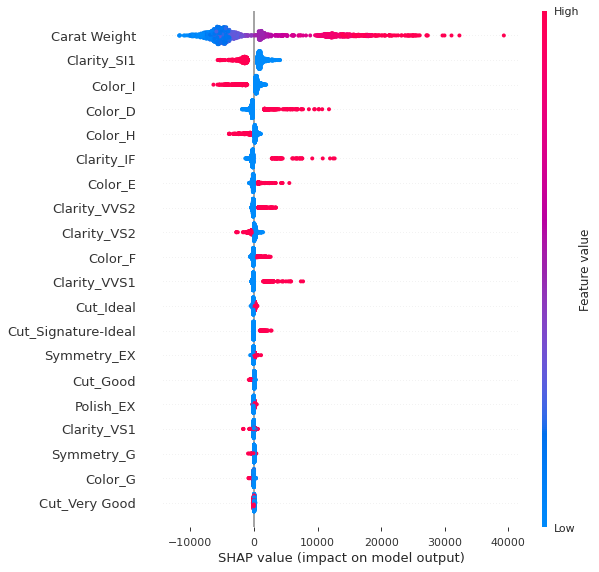

In [13]:
interpret_model(estimator=cat)

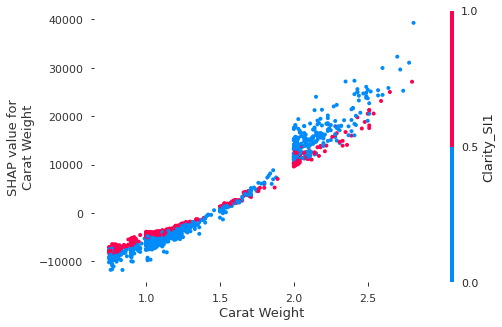

In [14]:
interpret_model(cat, plot = 'correlation', feature = 'Carat Weight', )

## Linear Regression

In [15]:
lr = create_model('lr')

In [16]:
evaluate_model(estimator=lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Bias Variance Problems
* Model Underfitting
  * Build New Data Features
  * Feature Engineering
    * Add Interaction Terms
    * Add Polynomial Terms
    * Differences & Sums
  * <font color="blue">Two other ideas?</font>
* Model Overfitting
  * Capture more data (Augment data)
  * Add Regularization (L1 & L2 Penalties)
  * Feature Selection
    * Remove low performing features
    * Start with all features & Remove least important
    * Start with no features & Incrementally add most important
  * Early Stopping
  

# Tuning
* Take model and explore hyperparameter tuning / options


## Approaches
* Grid Search
  * Given a list of hyperparameters generate values to test for each
  * Enumerate each combination
  * Expensive in terms of time
  * Redundant (if a particular value is poor we test it many times)
* Random Search
  * Practical approach
  * Randomly select from allowable combinations
  * Box to number of iterations or elapsed time
  * We search the space more efficiently
  * We might miss optimal values

![alt text](https://images.ctfassets.net/be04ylp8y0qc/4LbV7b6tEVlHROxHevpy2K/4ff835465f0a106104a79eaf17ca189c/1_P36a5xEr_C3fjcJU69yYmg.png?fm=jpg)

* Bayesian Optimization
  * Play "Battleship"
  * Search where it makes the most sense
  * Balance exploration & exploitation
  * Several libraries help (hyperopt)

In [25]:
cat_tuned = tune_model(cat, n_iter=50)

## Parameters Tuned

In [26]:
tuning_df = pd.DataFrame(columns=['Original', 'Tuned'])
for index, value in cat_tuned.get_all_params().items():
  tuning_df.loc[index] = [cat.get_all_params()[index], value]
tuning_df

Original           Tuned
nan_mode                                      Min             Min
eval_metric                                  RMSE            RMSE
iterations                                   1000             250
sampling_frequency                        PerTree         PerTree
leaf_estimation_method                     Newton          Newton
grow_policy                         SymmetricTree   SymmetricTree
penalties_coefficient                           1               1
boosting_type                               Plain           Plain
model_shrink_mode                        Constant        Constant
feature_border_type                  GreedyLogSum    GreedyLogSum
bayesian_matrix_reg                           0.1             0.1
l2_leaf_reg                                     3               1
random_strength                                 1               1
rsm                                             1               1
boost_from_average                           True            True
model_size_reg                                0.5             0.5
subsample                                     0.8             0.8
use_best_model                              False           False
random_seed                                   654             654
depth                                           6               7
border_count                                  254              50
classes_count                                   0               0
auto_class_weights                           None            None
sparse_features_conflict_fraction               0               0
leaf_estimation_backtracking       AnyImprovement  AnyImprovement
best_model_min_trees                            1               1
model_shrink_rate                               0               0
min_data_in_leaf                                1               1
loss_function                                RMSE            RMSE
learning_rate                            0.050387             0.3
score_function                             Cosine          Cosine
task_type                                     CPU             CPU
leaf_estimation_iterations                      1               1
bootstrap_type                                MVS             MVS
max_leaves                                     64             128

# Prediction
* How did we do on the holdout dataset?
* Our fine tuning beat out a default model by a little bit.
* CatBoost features good defaults, other models can benefit significantly from tuning.

In [27]:
pred_holdout_cat = predict_model(cat)

Model       MAE           MSE       RMSE      R2  RMSLE    MAPE
0  CatBoost Regressor  580.9704  1.347333e+06  1160.7467  0.9863  0.062  0.0461

In [28]:
pred_holdout_cat = predict_model(cat_tuned, )

Model       MAE           MSE  ...      R2   RMSLE    MAPE
0  CatBoost Regressor  668.2772  1.828649e+06  ...  0.9815  0.0722  0.0523

[1 rows x 7 columns]

## Interpret

In [29]:
interpret_model(cat_tuned, plot = 'reason', observation=0)

In [30]:
interpret_model(cat_tuned, plot = 'reason')

# Finalize
* We trained and evaluated on the train / test splits
* For a final model (deployed) use all the data

In [31]:
final_cat = finalize_model(estimator=cat_tuned)

# Deploy
* Store Pickle on S3
* Build into Docker
* Serve from EC2 / EKS / ECS 

# New Data

In [32]:
df.head()

Carat Weight    Cut Color Clarity Polish Symmetry Report  Price
0          1.10  Ideal     H     SI1     VG       EX    GIA   5169
1          0.83  Ideal     H     VS1     ID       ID   AGSL   3470
2          0.85  Ideal     H     SI1     EX       EX    GIA   3183
3          0.91  Ideal     E     SI1     VG       VG    GIA   4370
4          0.83  Ideal     G     SI1     EX       EX    GIA   3171

In [33]:
data = [{
  'Carat Weight':	1.1,
  'Cut': 'Ideal',
  'Color': 'E',	
  'Clarity': 'VS1',	
  'Polish': 'ID', 
  'Symmetry': 'EX',
  'Report': 'GIA'
}]
predict_model(cat_tuned, data = pd.DataFrame(data)) 

Carat Weight    Cut Color Clarity Polish Symmetry Report      Label
0           1.1  Ideal     E     VS1     ID       EX    GIA  8800.9304